In [1]:
!pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached pystan-3.6.0-py3-none-any.whl (13 kB)
  Using cached pysimdjson-5.0.2-cp39-cp39-win_amd64.whl (156 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
  Using cached pystan-3.5.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.4.0-py3-none-any.whl (13 kB)
  Using cached pysimdjson-3.2.0-cp39-cp39-win_amd64.whl (157 kB)
  Using cached pystan-3.3.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.2.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.1.1-py3-none-any.whl (13 kB)
  Using cached pystan-3.1.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.0.2-py3-none-any.whl (13 kB)
  Using cached pystan-3.0.1-py3-none-any.whl (12 kB)
  Using cached pystan-3.0.0-py3-none-any.whl (12 kB)
  Using cached pystan-2.19.1.1-cp39-cp39-win_amd64.whl
  Running setup.py clean for fbprophet
Failed to build fbprophet
  Running setup

  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [47 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib
      creating build\lib\fbprophet
      creating build\lib\fbprophet\stan_model
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\necme\AppData\Local\Temp\pip-install-v4ixhsmf\fbprophet_3741fdc976e149e3ba0b968af80ba83e\setup.py", line 122, in <module>
          setup(
        File "D:\Anaconda\lib\site-packages\setuptools\__init__.py", line 87, in setup
          return distutils.core.setup(**attrs)
        File "D:\Anaconda\lib\site-packages\setuptools\_distutils\core.py", line 148, in setup
          return run_commands(dist)
        File "D:\Anaconda\lib\site-packages\setuptools\_distutils\core.py", line 163, i

In [3]:
!pip install folium

In [4]:
!pip install shapely

Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install geopandas

     ---------------------------------------- 1.1/1.1 MB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 5.1/5.1 MB 2.5 MB/s eta 0:00:00
     -------------------------------------- 22.0/22.0 MB 818.6 kB/s eta 0:00:00



In [2]:
import folium
from shapely.ops import cascaded_union
from folium import Marker, PolyLine
from folium.plugins import HeatMap, HeatMapWithTime, MarkerCluster
import geopandas as gpd
from shapely.geometry import Point, LineString
TURK_LAT = 39.0618
TURK_LNG = 33.7500


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [38]:
#last_month = pd.read_csv("all_month.csv")
last_month = pd.read_csv("Unused/Significant_Earthquakes.csv")
last_month.head()

,Unnamed: 0,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,0,1900-10-09T12:25:00.000Z,57.09,-153.48,NaN,7.86,mw,NaN,NaN,NaN,...,2022-05-09T14:44:17.838Z,"16 km SW of Old Harbor, Alaska",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,pt
1,1,1901-03-03T07:45:00.000Z,36.00,-120.50,NaN,6.40,ms,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,"12 km NNW of Parkfield, California",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,ell
2,2,1901-07-26T22:20:00.000Z,40.80,-115.70,NaN,5.00,fa,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,"6 km SE of Elko, Nevada",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,sjg
3,3,1901-12-30T22:34:00.000Z,52.00,-160.00,NaN,7.00,ms,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,south of Alaska,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,abe
4,4,1902-01-01T05:20:30.000Z,52.38,-167.45,NaN,7.00,ms,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,"113 km ESE of Nikolski, Alaska",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,abe


In [40]:
last_month[last_month['place'].str.contains("[A-Za-z1-9:, ]+Turkey")==True]#[last_month['time'].str.contains("2023-03-06[A-Za-z1-9:]+")==True]

,Unnamed: 0,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
48,48,1905-05-20T11:06:10.250Z,40.1620,39.3970,15.000,5.62,mw,NaN,NaN,NaN,...,2022-04-25T20:39:20.629Z,"5 km NW of Kelkit, Turkey",earthquake,NaN,4.800,0.450,NaN,reviewed,iscgem,iscgem
75,75,1905-10-22T03:54:31.710Z,40.7610,28.1830,15.000,5.78,mw,NaN,NaN,NaN,...,2022-05-09T15:23:29.292Z,"30 km SE of Marmara Ere?lisi, Turkey",earthquake,NaN,3.900,0.520,NaN,reviewed,iscgemsup,iscgemsup
86,86,1905-12-04T12:20:07.960Z,37.2160,38.8300,15.000,5.56,mw,NaN,NaN,NaN,...,2022-04-25T20:24:32.586Z,"6 km NNE of ?anl?urfa, Turkey",earthquake,NaN,5.600,0.630,NaN,reviewed,iscgem,iscgem
87,87,1905-12-04T07:05:30.550Z,38.1530,38.6450,10.000,6.80,mw,NaN,NaN,NaN,...,2022-05-09T15:19:04.842Z,"13 km NNE of Sincik, Turkey",earthquake,NaN,4.900,0.720,NaN,reviewed,iscgemsup,iscgemsup
203,203,1907-06-03T06:45:11.370Z,38.0940,41.8780,15.000,5.30,mw,NaN,NaN,NaN,...,2022-05-09T15:19:29.869Z,"11 km SE of Baykan, Turkey",earthquake,NaN,25.000,0.200,NaN,reviewed,iscgemsup,iscgemsup
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95913,95913,2023-02-06T02:03:37.341Z,37.7712,37.9141,16.929,5.30,mb,154.0,35.0,0.792,...,2023-03-07T01:47:57.043Z,"2 km S of Tut, Turkey",earthquake,4.28,3.347,0.052,122.0,reviewed,us,us
95914,95914,2023-02-06T01:58:23.118Z,37.0302,36.6208,10.000,5.10,mb,120.0,69.0,0.492,...,2023-03-07T02:53:50.040Z,"12 km SSE of Hasanbeyli, Turkey",earthquake,5.06,1.841,0.060,91.0,reviewed,us,us
95916,95916,2023-02-06T01:28:15.784Z,37.1893,36.8929,9.797,6.70,mww,194.0,19.0,0.254,...,2023-03-22T20:01:02.806Z,"14 km E of Nurda??, Turkey",earthquake,7.68,3.333,0.098,10.0,reviewed,us,us
95917,95917,2023-02-06T01:26:50.804Z,37.2244,36.9975,10.000,5.70,mb,97.0,75.0,0.177,...,2023-03-24T05:41:55.448Z,"24 km ENE of Nurda??, Turkey",earthquake,5.16,1.825,0.072,69.0,reviewed,us,us


In [6]:
last_month[last_month['time'].str.contains("2023-03-06T04[A-Za-z1-9:]+")==True]

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
2677,2023-03-06T04:55:39.333Z,63.478300,-151.287300,6.00,1.20,ml,NaN,NaN,NaN,0.62,...,2023-03-10T20:21:58.477Z,"22 km ESE of Denali National Park, Alaska",earthquake,NaN,0.20,NaN,NaN,reviewed,ak,ak
2678,2023-03-06T04:53:27.878Z,60.603500,-153.231700,171.90,1.90,ml,NaN,NaN,NaN,0.61,...,2023-03-10T20:21:58.251Z,"74 km NE of Port Alsworth, Alaska",earthquake,NaN,0.50,NaN,NaN,reviewed,ak,ak
2679,2023-03-06T04:50:20.960Z,33.770833,-116.929333,13.58,0.58,ml,13.0,123.0,0.08366,0.09,...,2023-03-07T01:16:33.624Z,"3km ESE of San Jacinto, CA",earthquake,0.40,0.61,0.136000,11.0,reviewed,ci,ci
2680,2023-03-06T04:38:43.790Z,32.650000,-115.742167,8.86,1.92,ml,33.0,54.0,0.01333,0.21,...,2023-03-07T01:14:22.730Z,"17km WNW of Progreso, B.C., MX",earthquake,0.30,0.54,0.179000,24.0,reviewed,ci,ci
2681,2023-03-06T04:37:29.140Z,33.486167,-116.399667,12.54,0.35,ml,18.0,126.0,0.13080,0.13,...,2023-03-06T22:53:30.288Z,"21km SSW of La Quinta, CA",earthquake,0.30,0.71,0.181000,12.0,reviewed,ci,ci
2682,2023-03-06T04:26:43.508Z,60.951500,-149.229000,21.00,0.90,ml,NaN,NaN,NaN,0.27,...,2023-03-10T20:21:58.053Z,"3 km WNW of Girdwood, Alaska",earthquake,NaN,0.80,NaN,NaN,reviewed,ak,ak
2683,2023-03-06T04:23:49.600Z,57.128333,-135.619167,1.02,0.51,ml,4.0,120.0,NaN,0.30,...,2023-03-07T03:58:29.130Z,"19 km WNW of Sitka, Alaska",earthquake,3.19,4.50,0.102852,3.0,reviewed,av,av
2684,2023-03-06T04:09:50.470Z,35.554000,-120.773333,5.49,0.79,md,12.0,61.0,0.04174,0.08,...,2023-03-07T22:27:17.925Z,"6km W of Templeton, CA",earthquake,0.25,0.48,0.034000,7.0,reviewed,nc,nc


In [7]:
import re

for index in range(len(last_month['time'])):
    if(re.findall("2023-03-06T04[A-Za-z1-9:]+",last_month["time"][index])!=[]):
        print(last_month.loc[index]["place"])
    

22 km ESE of Denali National Park, Alaska
74 km NE of Port Alsworth, Alaska
3km ESE of San Jacinto, CA
17km WNW of Progreso, B.C., MX
21km SSW of La Quinta, CA
3 km WNW of Girdwood, Alaska
19 km WNW of Sitka, Alaska
6km W of Templeton, CA


In [8]:

encoding_list = ['ascii', 'big5', 'big5hkscs', 'cp037', 'cp273', 'cp424', 'cp437', 'cp500', 'cp720', 'cp737'
                 , 'cp775', 'cp850', 'cp852', 'cp855', 'cp856', 'cp857', 'cp858', 'cp860', 'cp861', 'cp862'
                 , 'cp863', 'cp864', 'cp865', 'cp866', 'cp869', 'cp874', 'cp875', 'cp932', 'cp949', 'cp950'
                 , 'cp1006', 'cp1026', 'cp1125', 'cp1140', 'cp1250', 'cp1251', 'cp1252', 'cp1253', 'cp1254'
                 , 'cp1255', 'cp1256', 'cp1257', 'cp1258', 'euc_jp', 'euc_jis_2004', 'euc_jisx0213', 'euc_kr'
                 , 'gb2312', 'gbk', 'gb18030', 'hz', 'iso2022_jp', 'iso2022_jp_1', 'iso2022_jp_2'
                 , 'iso2022_jp_2004', 'iso2022_jp_3', 'iso2022_jp_ext', 'iso2022_kr', 'latin_1', 'iso8859_2'
                 , 'iso8859_3', 'iso8859_4', 'iso8859_5', 'iso8859_6', 'iso8859_7', 'iso8859_8', 'iso8859_9'
                 , 'iso8859_10', 'iso8859_11', 'iso8859_13', 'iso8859_14', 'iso8859_15', 'iso8859_16', 'johab'
                 , 'koi8_r', 'koi8_t', 'koi8_u', 'kz1048', 'mac_cyrillic', 'mac_greek', 'mac_iceland', 'mac_latin2'
                 , 'mac_roman', 'mac_turkish', 'ptcp154', 'shift_jis', 'shift_jis_2004', 'shift_jisx0213', 'utf_32'
                 , 'utf_32_be', 'utf_32_le', 'utf_16']

for encoding in encoding_list:
    worked = True
    try:
        df = pd.read_csv("eq20.csv", encoding=encoding, nrows=5)
    except:
        worked = False
    if worked and str(df[df.columns[0]][0]) != "nan":
        print(encoding, ':\n', df.head())
        break
        
    

utf_16 :
    ID                DATE_            LOCATION_      LAT      LNG  MAG  DEPTH  \
0   1  2005-01-01 00:29:42  KORKUTELi (ANTALYA)  36.9197  30.3133  2.9   30.0   
1   2  2005-01-01 03:03:40        YUNAK (KONYA)  38.8177  31.8875  3.5    5.8   
2   3  2005-01-01 04:40:14              AKDENiZ  36.1153  28.4915  3.5   74.5   
3   4  2005-01-01 09:35:00       CUBUK (ANKARA)  40.3485  32.9603  3.0   15.1   
4   5  2005-01-01 11:17:43      MENEMEN (iZMiR)  38.8013  27.2075  2.9   28.3   

                      RECORDDATE  
0  2023-02-27 15:01:52.367000000  
1  2023-02-27 15:01:52.367000000  
2  2023-02-27 15:01:52.367000000  
3  2023-02-27 15:01:52.367000000  
4  2023-02-27 15:01:52.367000000  


In [17]:
df = pd.read_csv("eq20.csv", encoding=encoding, error_bad_lines=False)
df

b'Skipping line 114421: expected 8 fields, saw 9\nSkipping line 115729: expected 8 fields, saw 9\nSkipping line 117563: expected 8 fields, saw 9\nSkipping line 118716: expected 8 fields, saw 9\nSkipping line 127421: expected 8 fields, saw 9\nSkipping line 128142: expected 8 fields, saw 9\n'
b'Skipping line 137960: expected 8 fields, saw 9\nSkipping line 138066: expected 8 fields, saw 9\nSkipping line 139689: expected 8 fields, saw 9\nSkipping line 140753: expected 8 fields, saw 9\nSkipping line 141426: expected 8 fields, saw 9\nSkipping line 142841: expected 8 fields, saw 9\nSkipping line 142844: expected 8 fields, saw 9\nSkipping line 142846: expected 8 fields, saw 9\nSkipping line 144861: expected 8 fields, saw 9\nSkipping line 145582: expected 8 fields, saw 9\nSkipping line 146689: expected 8 fields, saw 9\nSkipping line 149056: expected 8 fields, saw 9\nSkipping line 150251: expected 8 fields, saw 9\nSkipping line 152718: expected 8 fields, saw 9\nSkipping line 154023: expected 8 f

,ID,DATE_,LOCATION_,LAT,LNG,MAG,DEPTH,RECORDDATE
0,1,2005-01-01 00:29:42,KORKUTELi (ANTALYA),36.9197,30.3133,2.9,30.0,2023-02-27 15:01:52.367000000
1,2,2005-01-01 03:03:40,YUNAK (KONYA),38.8177,31.8875,3.5,5.8,2023-02-27 15:01:52.367000000
2,3,2005-01-01 04:40:14,AKDENiZ,36.1153,28.4915,3.5,74.5,2023-02-27 15:01:52.367000000
3,4,2005-01-01 09:35:00,CUBUK (ANKARA),40.3485,32.9603,3.0,15.1,2023-02-27 15:01:52.367000000
4,5,2005-01-01 11:17:43,MENEMEN (iZMiR),38.8013,27.2075,2.9,28.3,2023-02-27 15:01:52.367000000
...,...,...,...,...,...,...,...,...
284578,284611,2023-02-18 21:57:48,KARAHASANUSAGI-ELBISTAN (KAHRAMANMARAS) ...,38.1273,37.5453,3.2,5.0,2023-02-27 15:02:29.527000000
284579,284612,2023-02-26 06:38:19,UMUTLU-NURHAK (KAHRAMANMARAS) ...,37.8832,37.2213,2.1,8.2,2023-02-27 15:02:29.527000000
284580,284613,2023-02-26 07:13:10,TURKIYE-IRAN SINIR BOLGESI ...,38.5592,44.8275,2.5,8.9,2023-02-27 15:02:29.527000000
284581,284614,2023-02-26 07:30:34,YAYLA-VARTO (MUS) ...,39.0577,41.2510,2.6,8.5,2023-02-27 15:02:29.527000000


In [18]:
df.drop(columns=["ID"],axis=1,inplace=True)
df

,DATE_,LOCATION_,LAT,LNG,MAG,DEPTH,RECORDDATE
0,2005-01-01 00:29:42,KORKUTELi (ANTALYA),36.9197,30.3133,2.9,30.0,2023-02-27 15:01:52.367000000
1,2005-01-01 03:03:40,YUNAK (KONYA),38.8177,31.8875,3.5,5.8,2023-02-27 15:01:52.367000000
2,2005-01-01 04:40:14,AKDENiZ,36.1153,28.4915,3.5,74.5,2023-02-27 15:01:52.367000000
3,2005-01-01 09:35:00,CUBUK (ANKARA),40.3485,32.9603,3.0,15.1,2023-02-27 15:01:52.367000000
4,2005-01-01 11:17:43,MENEMEN (iZMiR),38.8013,27.2075,2.9,28.3,2023-02-27 15:01:52.367000000
...,...,...,...,...,...,...,...
284578,2023-02-18 21:57:48,KARAHASANUSAGI-ELBISTAN (KAHRAMANMARAS) ...,38.1273,37.5453,3.2,5.0,2023-02-27 15:02:29.527000000
284579,2023-02-26 06:38:19,UMUTLU-NURHAK (KAHRAMANMARAS) ...,37.8832,37.2213,2.1,8.2,2023-02-27 15:02:29.527000000
284580,2023-02-26 07:13:10,TURKIYE-IRAN SINIR BOLGESI ...,38.5592,44.8275,2.5,8.9,2023-02-27 15:02:29.527000000
284581,2023-02-26 07:30:34,YAYLA-VARTO (MUS) ...,39.0577,41.2510,2.6,8.5,2023-02-27 15:02:29.527000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284583 entries, 0 to 284582
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   DATE_       284583 non-null  object 
 1   LOCATION_   284583 non-null  object 
 2   LAT         284583 non-null  float64
 3   LNG         284583 non-null  float64
 4   MAG         284583 non-null  float64
 5   DEPTH       284583 non-null  float64
 6   RECORDDATE  284583 non-null  object 
dtypes: float64(4), object(3)
memory usage: 15.2+ MB


In [21]:
df.isnull().sum()

DATE_         0
LOCATION_     0
LAT           0
LNG           0
MAG           0
DEPTH         0
RECORDDATE    0
dtype: int64

In [19]:
df.describe()

,LAT,LNG,MAG,DEPTH
count,284583.000000,284583.000000,284583.000000,284583.000000
mean,38.234964,31.376644,2.212529,9.774072
std,1.478462,5.534374,0.666044,10.137096
min,30.288700,18.343500,0.100000,0.000000
25%,37.078500,27.400700,1.700000,5.000000
50%,38.309500,28.804700,2.100000,7.300000
75%,39.233000,35.924300,2.700000,12.000000
max,45.809300,48.572500,7.600000,188.000000


In [34]:
df[['Date', 'Time']] = df['DATE_'].str.split(' ', n=1, expand=True)
df.drop(columns=["DATE_"],inplace=True)
df.head()

,LOCATION_,LAT,LNG,MAG,DEPTH,RECORDDATE,Date,Time
0,KORKUTELi (ANTALYA),36.9197,30.3133,2.9,30.0,2023-02-27 15:01:52.367000000,2005-01-01,00:29:42
1,YUNAK (KONYA),38.8177,31.8875,3.5,5.8,2023-02-27 15:01:52.367000000,2005-01-01,03:03:40
2,AKDENiZ,36.1153,28.4915,3.5,74.5,2023-02-27 15:01:52.367000000,2005-01-01,04:40:14
3,CUBUK (ANKARA),40.3485,32.9603,3.0,15.1,2023-02-27 15:01:52.367000000,2005-01-01,09:35:00
4,MENEMEN (iZMiR),38.8013,27.2075,2.9,28.3,2023-02-27 15:01:52.367000000,2005-01-01,11:17:43


In [35]:
#df["Date"] = df['Date'].apply(lambda x: x.replace('-', '.')) same process
df["Date"] = df['Date'].str.replace('-','.')
df.head()

,LOCATION_,LAT,LNG,MAG,DEPTH,RECORDDATE,Date,Time
0,KORKUTELi (ANTALYA),36.9197,30.3133,2.9,30.0,2023-02-27 15:01:52.367000000,2005.01.01,00:29:42
1,YUNAK (KONYA),38.8177,31.8875,3.5,5.8,2023-02-27 15:01:52.367000000,2005.01.01,03:03:40
2,AKDENiZ,36.1153,28.4915,3.5,74.5,2023-02-27 15:01:52.367000000,2005.01.01,04:40:14
3,CUBUK (ANKARA),40.3485,32.9603,3.0,15.1,2023-02-27 15:01:52.367000000,2005.01.01,09:35:00
4,MENEMEN (iZMiR),38.8013,27.2075,2.9,28.3,2023-02-27 15:01:52.367000000,2005.01.01,11:17:43


In [ ]:
df[]

In [33]:
big_mag_df = df[df["MAG"]>6]

fig = px.scatter_mapbox(big_mag_df, lat="LAT", lon="LNG", hover_name="LOCATION_", hover_data=["DEPTH", "MAG","DATE_"],
                        color_discrete_sequence=["light green"], zoom=5, height=300)
fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
      ])
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [30]:
tr = pd.read_csv('Turkey_earthquakes.csv')
print (tr.shape)
tr.head(5)

(78, 7)


,Date,Time‡,Place,Lat,Long,Deaths,Mag
0,10 September 1509,NaN,Constantinople,40.9,28.7,"10,000",7.2 Mw
1,23 February 1653,NaN,Smyrna,38.2,28.2,"2,500",7.5 Mw
2,17 August 1668,NaN,Anatolia,40.0,36.0,"8,000",8M w
3,10 July 1688,11:45,Smyrna,38.4,26.9,"16,000",7.0 Mw
4,22 May 1766,05:10,Istanbul,40.8,29.0,"4,000",7.1 Mw


In [31]:
tr.Place.value_counts()

Smyrna      3
Bingöl      3
Erzincan    3
Çeşme       2
Ayvalık     2
           ..
Horasan     1
Hendek      1
Hakkâri     1
Erbaa       1
Izmir       1
Name: Place, Length: 65, dtype: int64

In [32]:
tr.Place.describe()


count         78
unique        65
top       Smyrna
freq           3
Name: Place, dtype: object

In [33]:
tr['geometry'] = tr.apply(lambda row:  Point(row["Long"], row["Lat"]), axis=1)
tr.head()

,Date,Time‡,Place,Lat,Long,Deaths,Mag,geometry
0,10 September 1509,NaN,Constantinople,40.9,28.7,"10,000",7.2 Mw,POINT (28.7 40.9)
1,23 February 1653,NaN,Smyrna,38.2,28.2,"2,500",7.5 Mw,POINT (28.2 38.2)
2,17 August 1668,NaN,Anatolia,40.0,36.0,"8,000",8M w,POINT (36 40)
3,10 July 1688,11:45,Smyrna,38.4,26.9,"16,000",7.0 Mw,POINT (26.9 38.4)
4,22 May 1766,05:10,Istanbul,40.8,29.0,"4,000",7.1 Mw,POINT (29 40.8)


In [34]:
tr["parsed_Date"] = pd.to_datetime(tr["Date"], format="%d %B %Y", errors = 'coerce')
tr.head()

,Date,Time‡,Place,Lat,Long,Deaths,Mag,geometry,parsed_Date
0,10 September 1509,NaN,Constantinople,40.9,28.7,"10,000",7.2 Mw,POINT (28.7 40.9),NaT
1,23 February 1653,NaN,Smyrna,38.2,28.2,"2,500",7.5 Mw,POINT (28.2 38.2),NaT
2,17 August 1668,NaN,Anatolia,40.0,36.0,"8,000",8M w,POINT (36 40),NaT
3,10 July 1688,11:45,Smyrna,38.4,26.9,"16,000",7.0 Mw,POINT (26.9 38.4),1688-07-10
4,22 May 1766,05:10,Istanbul,40.8,29.0,"4,000",7.1 Mw,POINT (29 40.8),1766-05-22


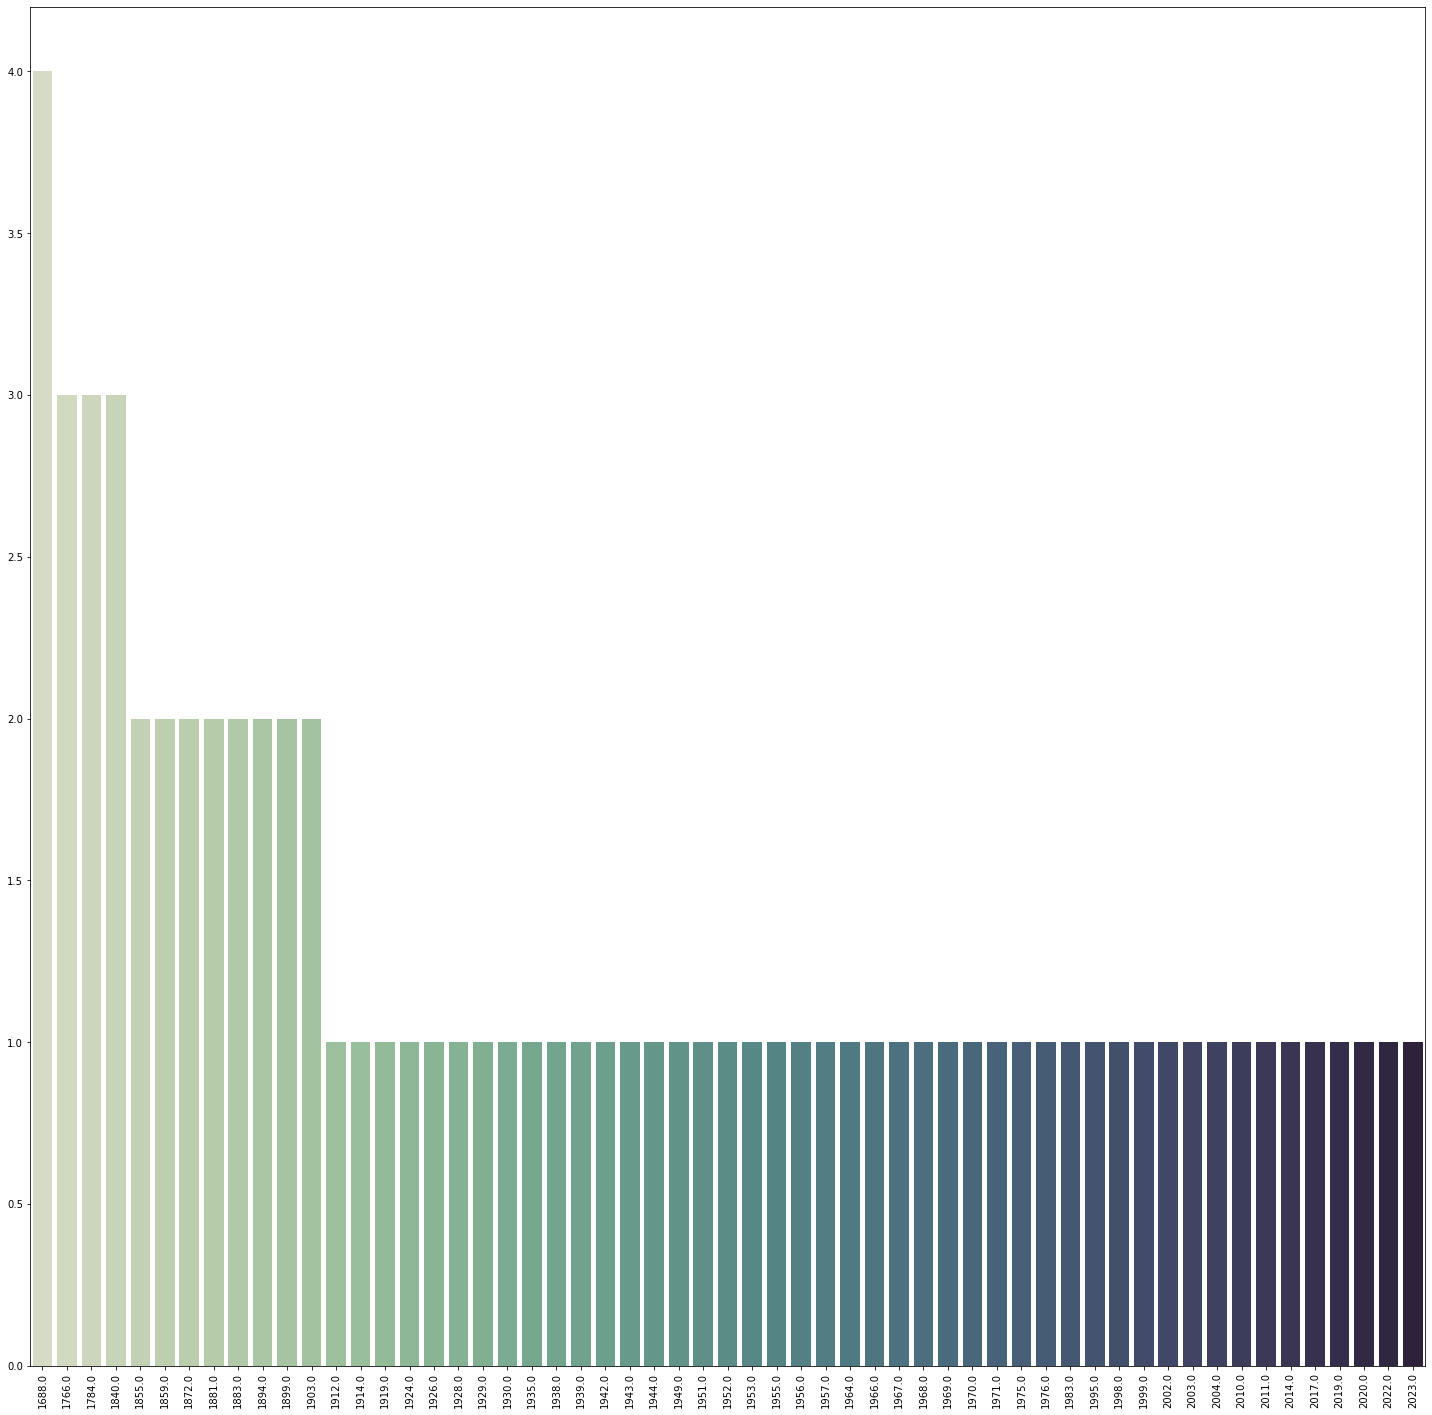

In [54]:
tr['year'] = tr['parsed_Date'].dt.year
labels_turkey = tr.year.value_counts().index
plt.figure(figsize=(25,25))
pal = sns.cubehelix_palette(len(tr.year.value_counts().index), start=.5, rot=-.75)
sns.barplot(x=np.sort(tr.year.value_counts().index) ,y = tr.year.value_counts().values,palette =pal )
plt.xticks(rotation=90 , color ='black')
plt.show()

In [35]:
gdf_earthquakes = gpd.GeoDataFrame(tr, geometry=tr.geometry )
print(gdf_earthquakes.shape)
gdf_earthquakes.head()

(78, 9)


,Date,Time‡,Place,Lat,Long,Deaths,Mag,geometry,parsed_Date
0,10 September 1509,NaN,Constantinople,40.9,28.7,"10,000",7.2 Mw,POINT (28.70000 40.90000),NaT
1,23 February 1653,NaN,Smyrna,38.2,28.2,"2,500",7.5 Mw,POINT (28.20000 38.20000),NaT
2,17 August 1668,NaN,Anatolia,40.0,36.0,"8,000",8M w,POINT (36.00000 40.00000),NaT
3,10 July 1688,11:45,Smyrna,38.4,26.9,"16,000",7.0 Mw,POINT (26.90000 38.40000),1688-07-10
4,22 May 1766,05:10,Istanbul,40.8,29.0,"4,000",7.1 Mw,POINT (29.00000 40.80000),1766-05-22


<AxesSubplot:>

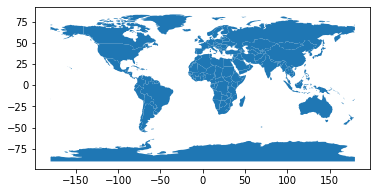

In [36]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot()

<AxesSubplot:>

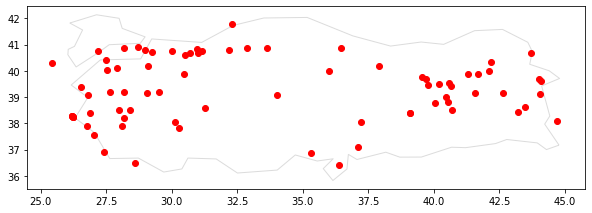

In [37]:
ax = world[world.name=='Turkey'].plot(figsize=(10, 10), color='none', edgecolor='gainsboro')
gdf_earthquakes.plot(ax=ax, color ='red')

In [38]:
m_1 = folium.Map(location=(TURK_LAT, TURK_LNG), titles='cartodbpositron', zooms=5)
for i, row in gdf_earthquakes.iterrows():
    popup_text = "number of Deaths : " + str(row.Deaths) + "\n Magnitude : "+ str(row.Mag) + "\n Date : " + str(row.Date)
    Marker([row.geometry.y, row.geometry.x], popup=popup_text).add_to(m_1)
m_1

In [40]:
#Cleaning Deaths column
gdf_earthquakes.Deaths = gdf_earthquakes.Deaths.str.strip()
gdf_earthquakes.Deaths = gdf_earthquakes.Deaths.map(lambda s: s.replace(',', ''))
gdf_earthquakes.Deaths = gdf_earthquakes.Deaths.astype('int')

In [41]:
gdf_earthquakes.loc[:, ['Lat', 'Long', 'Deaths']]


,Lat,Long,Deaths
0,40.9000,28.7000,10000
1,38.2000,28.2000,2500
2,40.0000,36.0000,8000
3,38.4000,26.9000,16000
4,40.8000,29.0000,4000
...,...,...,...
73,39.4200,40.6700,1
74,37.9180,26.7900,117
75,40.8470,30.9670,2
76,37.1123,37.1195,29600


In [42]:
m_3 = folium.Map(location=(TURK_LAT, TURK_LNG),zooms=15)
HeatMap(gdf_earthquakes.loc[:, ['Lat', 'Long', 'Deaths']], gradient={0.4: 'blue', 0.65: 'lime', 1: 'red'}).add_to(m_3)
m_3


In [44]:
fig = px.scatter_mapbox(gdf_earthquakes, lat="Lat", lon="Long", hover_name="Place", hover_data=["Mag", "parsed_Date"],
                        color_discrete_sequence=["light green"], zoom=5, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()